## Importing all the library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [2]:
df= pd.read_csv('Eai.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

### Data Preprocessing

In [4]:
# deleting the unwanted features

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace = True)

In [7]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [8]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [9]:
 pip --version

pip 23.2.1 from /Users/adityathapa/anaconda3/lib/python3.11/site-packages/pip (python 3.11)
Note: you may need to restart the kernel to use updated packages.


In [10]:
# pip install pandas-profiling

In [11]:
# from pandas_profiling import ProfileReport

## Making Profile Report 

In [12]:
# profile = ProfileReport(df,title = "Customer Churn Model Report",explorative = True)
# profile.to_notebook_iframe()

In [13]:
# checking the shape of data
df.shape

(10000, 11)

In [14]:
# checking all the null values
# df.isna().sum()

In [9]:
# checking unique value in columns

for col in df.columns[1:6]:
    print(df[col].unique())


['France' 'Spain' 'Germany']
['Female' 'Male']
[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
[ 2  1  8  7  4  6  3 10  5  9  0]
[     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]


In [10]:
# counting the unique age value
df['Age'].nunique()

70

In [17]:
# range = {'under_30':range(0,30),'adult':range(30,60),'elderly':range(60,90),'old_age':range(90,120)}

In [18]:
# inv_range = dict(map(reversed, range.items()))

In [19]:
# df['Age'] = df['Age'].map(inv_range) 

In [20]:
# df['Age']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
#

## Visualizing the data taking in customer Churn

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [15]:
[features for features in df.columns if df[features].isna().sum()>0]  ## it shows which columns has null value with list

[]

In [16]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

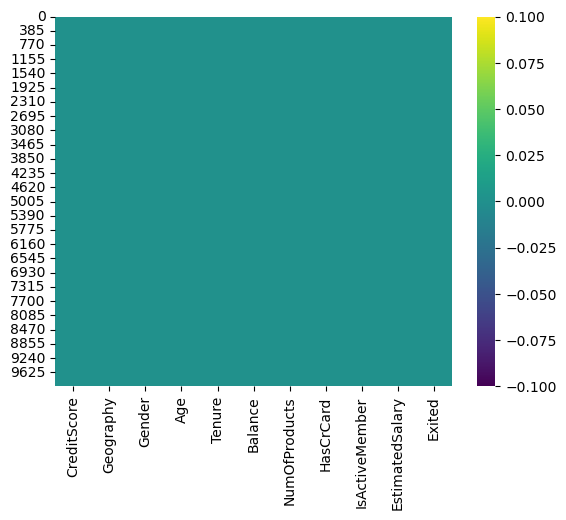

In [17]:
sns.heatmap(df.isna(),cmap='viridis')

In [19]:
# sns.heatmap(df.corr(),cmap='coolwarm', annot = True,fmt ='.2f')
# plt.savefig('correlation.png',dpi = 300)
# plt.show()

In [20]:
feature = ['Geography', 'Gender', 'Age', 'Tenure', 
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']

In [21]:
list(enumerate(feature))

[(0, 'Geography'),
 (1, 'Gender'),
 (2, 'Age'),
 (3, 'Tenure'),
 (4, 'NumOfProducts'),
 (5, 'HasCrCard'),
 (6, 'IsActiveMember')]

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
Product_values = df['NumOfProducts'].value_counts().values
Product_labels = df['NumOfProducts'].value_counts().index

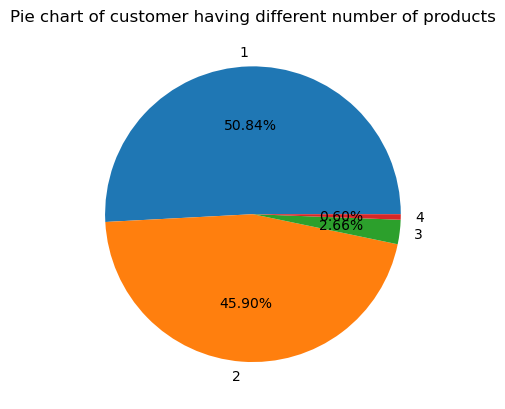

In [24]:
plt.title('Pie chart of customer having different number of products')
plt.pie(Product_values,labels = Product_labels, autopct = '%1.2f%%')
plt.show()

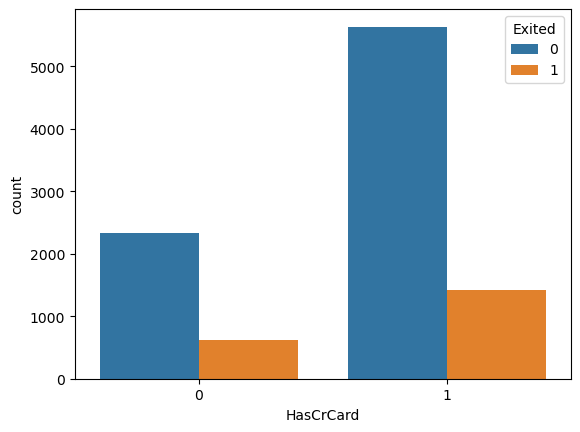

In [25]:
# fig,ax = plt.subplots(7,1,figsize = (15,10))
cols = ['Geography', 'Gender',  'Tenure', 
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
title = ['Geography', 'Gender', 'Age', 'Tenure', 
       'NumOfProducts', 'HasCrCard', 'IsActiveMember']
# i,j=0
sns.countplot(data= df,x='HasCrCard',hue = 'Exited' )
plt.show()

In [26]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [27]:
# sns.countplot(data= df,x='Tenure',hue = 'Exited' )
# plt.show()

In [28]:
# fig ,ax = plt.subplots(3,3,figsize= (15,10))
# sns.countplot(ax = ax[0,0],data= df,x='NumOfProducts',hue = 'Exited' )
# sns.countplot(ax = ax[0,1],data= df,x='Gender',hue = 'Exited' )
# sns.countplot(ax = ax[0,2],data= df,x='Age',hue = 'Exited' )
# sns.countplot(ax = ax[1,0],data= df,x='Tenure',hue = 'Exited' )
# sns.countplot(ax = ax[1,1],data= df,x='HasCrCard',hue = 'Exited' )
# sns.countplot(ax = ax[1,2],data= df,x='IsActiveMember',hue = 'Exited' )
# sns.countplot(ax = ax[2,0],data= df,x='Geography',hue = 'Exited' )

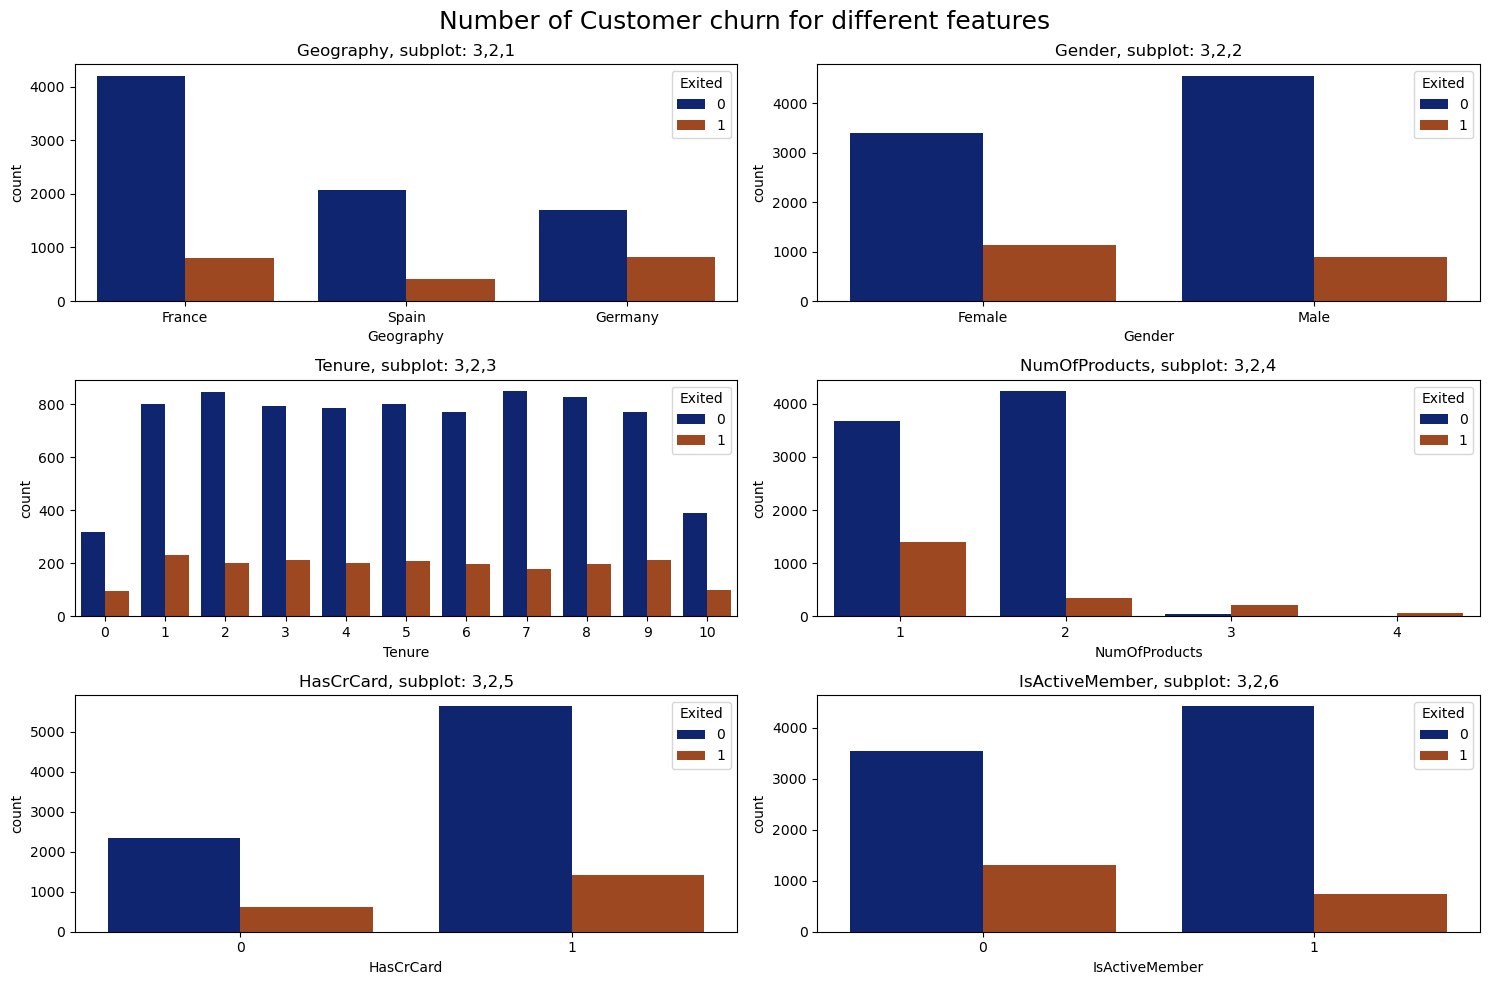

In [29]:
a=3 #number of rows
b=2 #number of columns
c = 1   # initialize plot counter
fig = plt.figure(figsize = (15,10))
plt.suptitle("Number of Customer churn for different features", fontsize = 18)
for i in cols:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.countplot(data = df, x = i, hue = 'Exited',palette="dark")
    c = c + 1
    
plt.tight_layout()
# plt.savefig('Countplot.png',dpi = 2000,facecolor = 'white')
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

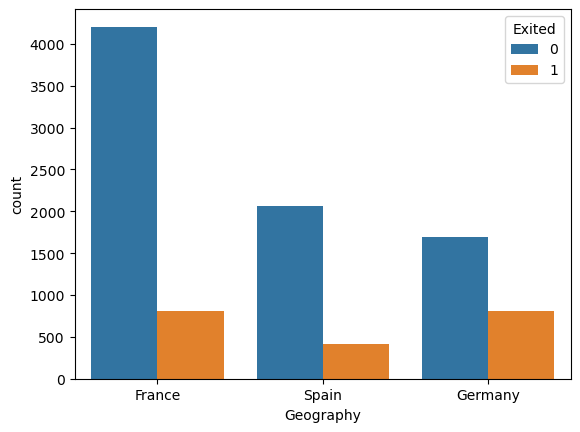

In [30]:
sns.countplot(data = df,x = 'Geography',hue = 'Exited')

In [31]:
# sns.pairplot(df,hue= 'Exited')
# plt.savefig('pairplot.png',dpi = 300,facecolor='white')

In [32]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [33]:
X = df.drop(['Exited'],axis = 1)
y= df['Exited']

In [34]:
X.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [35]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [36]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [37]:
#spliting the data for modeling and training

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [38]:
y_test.value_counts()

Exited
0    2003
1     497
Name: count, dtype: int64

In [39]:
print(X_train.shape)
print(y_train.shape)

(7500, 10)
(7500,)


### Column Transformer and Pipeline

In [40]:
# pip install xgboost

In [41]:
# using ColumnTransfer to encocde multiple column
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [42]:
Encoding  = ColumnTransformer(transformers=[
    ('OneHot_geo_gender',OneHotEncoder(sparse=False,drop = 'first'),['Geography','Gender'])
],remainder = 'passthrough')

In [43]:
#Scaling the data for better results
Scaling = ColumnTransformer(transformers=
                            [('Scale',StandardScaler(),slice(0,11))])

In [44]:
from xgboost import XGBClassifier
XG = XGBClassifier()

### Create Pipeline

In [45]:
from sklearn.pipeline import Pipeline,make_pipeline
from imblearn.pipeline import Pipeline
from sklearn import set_config   #for displaying pipeline
set_config(display = 'diagram') 

In [46]:
print(X_train.shape,y_train.shape)

(7500, 10) (7500,)


In [47]:
pipe = Pipeline([
    ('Encoding',Encoding),
    ('Estimator',XG)
])

In [48]:
## when we use the algorithm in the pipeline we use fit for pipeline or else we use fit_transform like here we use xgb as our algorithm

pipe.fit(X_train,y_train)

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Estimator',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [49]:
y_pred_XGB = pipe.predict(X_test)
y_pred_XGB

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [51]:
accuracy_score(y_test,y_pred_XGB)

0.8588

In [52]:
pipe_balanced = Pipeline([
    ('Encoding',Encoding),
    ('Scaling',Scaling),
    ('smote',SMOTE(random_state = 15)),
    ('Estimator',XG)
])

In [53]:
pipe_balanced.fit(X_train,y_train)

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Scaling',
                 ColumnTransformer(transformers=[('Scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('smote', SMOTE(random_state=15)),
                ('Estimator',
                 XGBClassifier(base_score=None, booster=Non...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [54]:
y_pred_balanced_XGB = pipe_balanced.predict(X_test)
y_pred_balanced_XGB

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy_score(y_test,y_pred_balanced_XGB)

0.86

In [56]:
import warnings
warnings.filterwarnings('ignore')

## Hyperparameter Tuning

In [60]:
## Hyperparametere tunning
params_grid = {
    "Estimator__learning_rate":[0.1,0.15],
    "Estimator__max_depth":[1,3,2],
    "Estimator__min_child_weight":[1,2,3],
    "Estimator__max_delta_step":[0,1,2],  ##(typically used when the class is imbalanced)
    "Estimator__n_estimators": range(50,200,50)
}

In [63]:
grid_search = GridSearchCV(pipe_balanced,params_grid,verbose = 3,n_jobs = -1)

In [64]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/adityathapa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to

GridSearchCV(estimator=Pipeline(steps=[('Encoding',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot_geo_gender',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['Geography',
                                                                          'Gender'])])),
                                       ('Scaling',
                                        ColumnTransformer(transformers=[('Scale',
                                                                         StandardScaler(),
                                                                         slice(0, 11, None))])),
                                       ('smote', SMOTE(random_state=15)),
                                       ('Estimator',
                                        XGBClassifier(base...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'Estimator__learning_rate': [0.1, 0.15],
                         'Estimator__max_delta_step': [0, 1, 2],
                         'Estimator__max_depth': [1, 3, 2],
                         'Estimator__min_child_weight': [1, 2, 3],
                         'Estimator__n_estimators': range(50, 200, 50)},
             verbose=3)

In [65]:
grid_search.best_params_

{'Estimator__learning_rate': 0.15,
 'Estimator__max_delta_step': 2,
 'Estimator__max_depth': 3,
 'Estimator__min_child_weight': 1,
 'Estimator__n_estimators': 150}

In [67]:
#grid_search.best_score_

In [68]:
## before tuning accuracy score 0.85
## after tunning accuracy score 0.86

In [69]:
pipe_best = Pipeline([
    ('Encoding',Encoding),
    ('Estimator',XGBClassifier(
    n_estimators=190,max_depth = 3,min_child_weight = 1,max_delta_step = 1,learning_rate = 0.15))
])

In [70]:
pipe_best.fit(X_train,y_train)

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Estimator',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=3, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=190,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [71]:
y_pred_XG = pipe_best.predict(X_test)
y_pred_XG

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
acc_XG = accuracy_score(y_test,y_pred_XG)
acc_XG

0.8704

In [73]:
from sklearn.metrics import classification_report

In [74]:
report1 = classification_report(y_test,y_pred_XG)
print(report1)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2003
           1       0.76      0.51      0.61       497

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.77      2500
weighted avg       0.86      0.87      0.86      2500



In [75]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(pipe_best, file)

In [76]:
pipe_best.named_steps

{'Encoding': ColumnTransformer(remainder='passthrough',
                   transformers=[('OneHot_geo_gender',
                                  OneHotEncoder(drop='first', sparse=False),
                                  ['Geography', 'Gender'])]),
 'Estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.15, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
               max_depth=3, max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=190,
               n_jobs=None, num_parallel_tree=None, random_state=None

In [77]:
cm0 = confusion_matrix(y_test,y_pred_XG)
print(cm0)

[[1925   78]
 [ 246  251]]


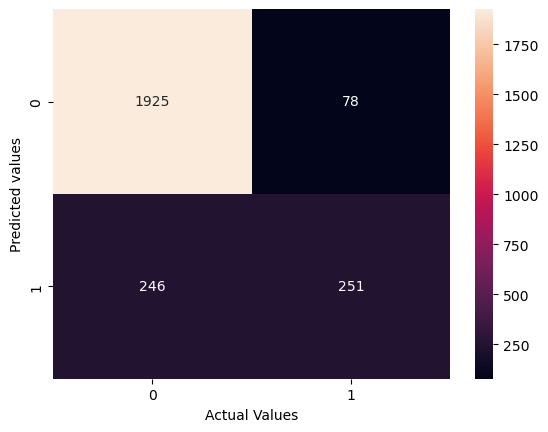

In [78]:
custom_cmap = sns.color_palette("YlGnBu")

sns.heatmap(cm0,annot= True,fmt= 'd')
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.savefig('confusion.png',dpi = 300)
plt.show()


In [79]:
cm = confusion_matrix(y_test,y_pred_XG)
print(cm)

[[1925   78]
 [ 246  251]]


In [80]:
pipe1 = Pipeline([
    ('Encoding',Encoding),
#     ('Scaling',Scaling)
])

In [81]:
pipe1.fit_transform(X_train,y_train)

array([[0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 2.106371e+04],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 3.182584e+04],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 6.132643e+04],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 9.222012e+04],
       [0.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        0.000000e+00, 9.750804e+04],
       [1.000000e+00, 0.000000e+00, 1.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 5.358114e+04]])

In [82]:
X_train_trans = pipe1.fit_transform(X_train)

In [83]:
X_test_trans = pipe1.transform(X_test)

## Random Forest model


In [84]:
## using same pipeline we created before
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

In [85]:
pipe2 = Pipeline([
    ('Encoding',Encoding),
    ('Scaling',Scaling),
    ('Smote',SMOTE(random_state=7)),
    ('RF',RF)
])

In [86]:
pipe2.fit(X_train,y_train)

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Scaling',
                 ColumnTransformer(transformers=[('Scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Smote', SMOTE(random_state=7)),
                ('RF', RandomForestClassifier())])

In [87]:
y_pred_RF = pipe2.predict(X_test)
y_pred_RF

array([0, 0, 0, ..., 0, 0, 0])

In [88]:
acc_RF = accuracy_score(y_test,y_pred_RF)
acc_RF

0.8332

In [89]:
cm1 = confusion_matrix(y_test,y_pred_RF)

In [90]:
reportRF = classification_report(y_test,y_pred_RF)
print(reportRF)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2003
           1       0.58      0.59      0.58       497

    accuracy                           0.83      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.83      0.83      0.83      2500



## KNN Model

In [91]:
#we will use create pipeline model using columntransformer we created before
from sklearn.neighbors import KNeighborsClassifier

In [92]:
trf5 = KNeighborsClassifier(n_neighbors = 5)

In [93]:
pipe3 = Pipeline([
    ('Encoding',Encoding),
    ('Scaling',Scaling),
    ('trf5',trf5)
])

In [94]:
pipe3.fit(X_train,y_train)

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Scaling',
                 ColumnTransformer(transformers=[('Scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('trf5', KNeighborsClassifier())])

In [95]:
y_pred_KNN = pipe3.predict(X_test)
y_pred_KNN

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
acc_KNN = accuracy_score(y_test,y_pred_KNN)
acc_KNN

0.8304

In [97]:
cm2 = confusion_matrix(y_test,y_pred_KNN)

In [98]:
report_KNN = classification_report(y_test,y_pred_KNN)
print(report_KNN)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2003
           1       0.63      0.37      0.46       497

    accuracy                           0.83      2500
   macro avg       0.74      0.66      0.68      2500
weighted avg       0.81      0.83      0.81      2500



In [99]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [100]:
import warnings
warnings.filterwarnings('ignore')

## SVC Model


In [101]:
from sklearn.svm import SVC

In [102]:
pipe_SVC = Pipeline([
    ('Encoding',Encoding),
    ('Scaling',Scaling),
    ('Estimator',SVC())
])

In [103]:
pipe_SVC.fit(X_train,y_train)

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Scaling',
                 ColumnTransformer(transformers=[('Scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('Estimator', SVC())])

In [104]:
y_pred_SVC = pipe_SVC.predict(X_test)
y_pred_SVC

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
acc_SVC=accuracy_score(y_test,y_pred_SVC)
acc_SVC

0.8564

In [106]:
cm3 = confusion_matrix(y_test, y_pred_SVC)

In [107]:
report_SVC = classification_report(y_test,y_pred_SVC)
print(report_SVC)

              precision    recall  f1-score   support

           0       0.86      0.97      0.92      2003
           1       0.78      0.39      0.52       497

    accuracy                           0.86      2500
   macro avg       0.82      0.68      0.72      2500
weighted avg       0.85      0.86      0.84      2500



## ANN Model

In [110]:
#pip install tensorflow


In [111]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [112]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [113]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [114]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [115]:
model.fit(X_train_trans,y_train,epochs = 10)

Epoch 1/10
235/235 [==============================] - 1s 1ms/step - loss: 528.8248 - accuracy: 0.6955
Epoch 2/10
235/235 [==============================] - 0s 978us/step - loss: 56.4770 - accuracy: 0.7035
Epoch 3/10
235/235 [==============================] - 0s 1ms/step - loss: 46.0642 - accuracy: 0.6956
Epoch 4/10
235/235 [==============================] - 0s 1ms/step - loss: 38.1771 - accuracy: 0.7040
Epoch 5/10
235/235 [==============================] - 0s 1ms/step - loss: 31.1604 - accuracy: 0.7049
Epoch 6/10
235/235 [==============================] - 0s 990us/step - loss: 34.4885 - accuracy: 0.6976
Epoch 7/10
235/235 [==============================] - 0s 1ms/step - loss: 50.7826 - accuracy: 0.6983
Epoch 8/10
235/235 [==============================] - 0s 1ms/step - loss: 43.2025 - accuracy: 0.6999
Epoch 9/10
235/235 [==============================] - 0s 1ms/step - loss: 31.7790 - accuracy: 0.6999
Epoch 10/10
235/235 [==============================] - 0s 966us/step - loss: 28.0024 -

In [116]:
# model.layers[0].get_weights()  ## it shows the weight and bias of first layer

In [117]:
y_prob = model.predict(X_test_trans)

79/79 [==============================] - 0s 857us/step


In [118]:
y_pred_ANN = np.where(y_prob>0.5,1,0)
y_pred_ANN

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [119]:
acc_ANN = accuracy_score(y_test,y_pred_ANN)
acc_ANN

0.7516

In [120]:
cm4 =confusion_matrix(y_test, y_pred_ANN)

In [121]:
report_ANN = classification_report(y_test,y_pred_ANN)
print(report_ANN)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2003
           1       0.29      0.18      0.22       497

    accuracy                           0.75      2500
   macro avg       0.55      0.54      0.54      2500
weighted avg       0.71      0.75      0.73      2500



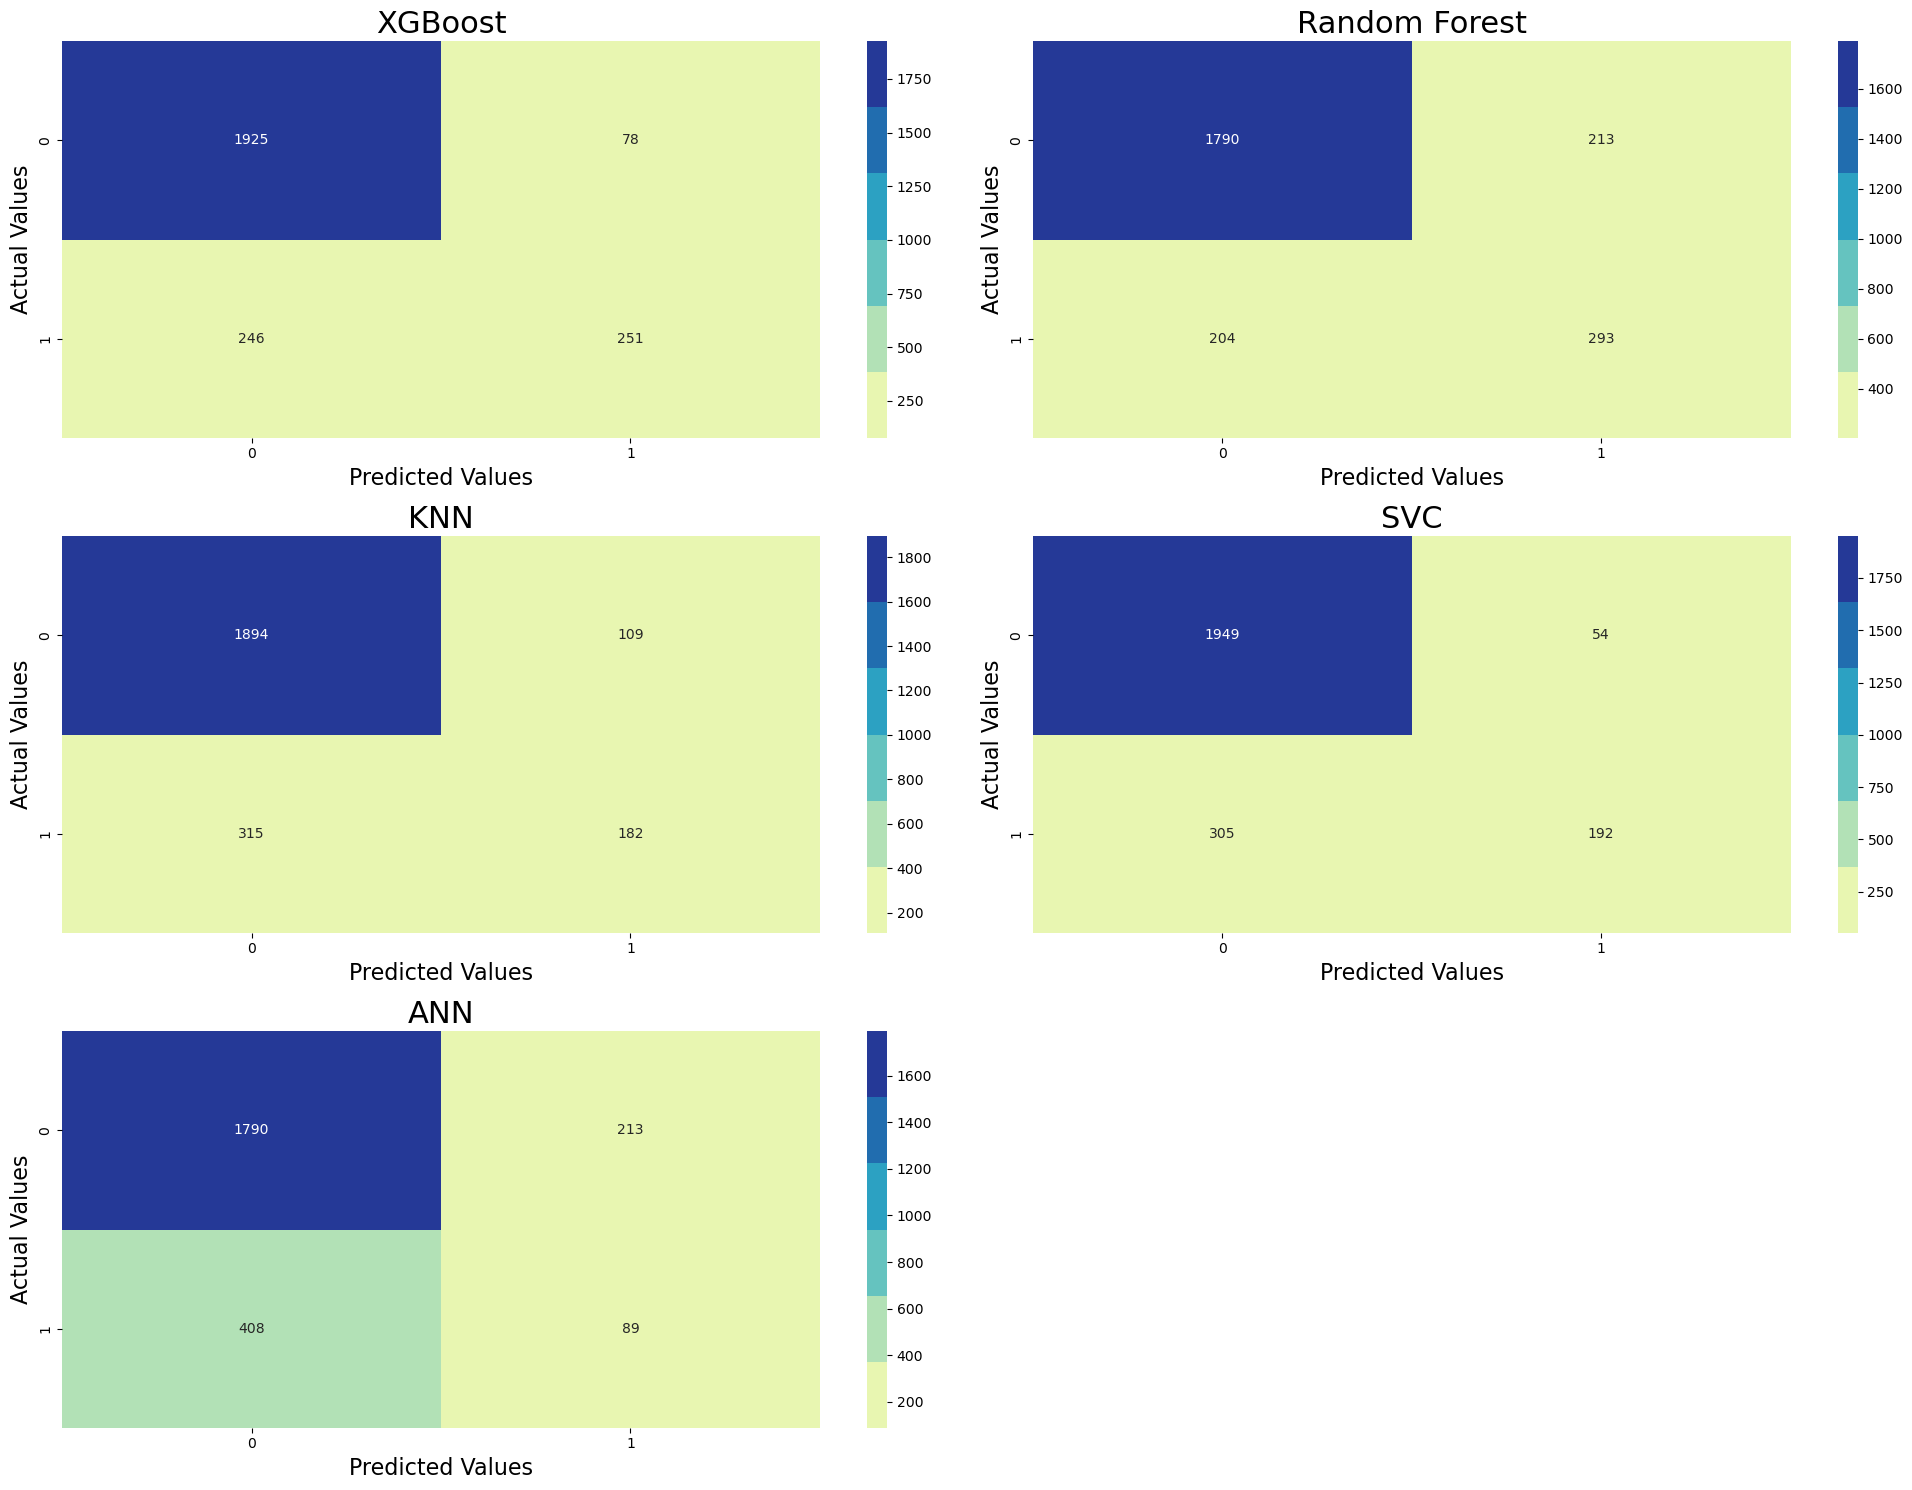

In [122]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

# List of model names (for titles)
model_names = ["XGBoost", "Random Forest", "KNN", "SVC", "ANN"]

# Custom color palette for the heatmap
custom_cmap = sns.color_palette("YlGnBu")

# Plot the confusion matrices for each model
for i, ax in enumerate(axes.flat):
    if i<5:
        sns.heatmap(eval(f"cm{i}"), annot=True, fmt="d", ax=ax, cmap = custom_cmap)
        ax.set_xlabel("Predicted Values",fontsize = 16)
        ax.set_ylabel("Actual Values", fontsize = 16)
        ax.set_title(model_names[i],fontsize = 22)
    
    # Since we have 5 plots only we have to delete 3rd row 2 column axes
    else:
        fig.delaxes(ax)

# Adjust the layout and add a title
plt.tight_layout()
# plt.suptitle("Confusion Matrices ", fontsize=16)
# plt.savefig("Confusion_Matrix.png", dpi =1800)
plt.show()

In [123]:
print(f"Accuracy different Models\n XGBoost: {acc_XG}\n Random Forest: {acc_RF}\n KNN Model: {acc_KNN}\n SVC Model: {acc_SVC}\n ANN Model:{acc_ANN}")

Accuracy different Models
 XGBoost: 0.8704
 Random Forest: 0.8332
 KNN Model: 0.8304
 SVC Model: 0.8564
 ANN Model:0.7516


## Plotting ROC AND AUC Curve

In [124]:
from sklearn.metrics import roc_curve, auc

In [125]:
RF_fpr,RF_tpr, threshold = roc_curve(y_test,y_pred_RF)
auc_RF = auc(RF_fpr,RF_tpr)

In [126]:
KNN_fpr,KNN_tpr, threshold = roc_curve(y_test,y_pred_KNN)
auc_KNN = auc(KNN_fpr,KNN_tpr)

In [127]:
XGB_fpr,XGB_tpr, threshold = roc_curve(y_test,y_pred_XGB)
auc_XGB = auc(XGB_fpr,XGB_tpr)

In [128]:
SVC_fpr,SVC_tpr, threshold = roc_curve(y_test,y_pred_SVC)
auc_SVC = auc(SVC_fpr,SVC_tpr)

In [129]:
ANN_fpr,ANN_tpr, threshold = roc_curve(y_test,y_pred_ANN)
auc_ANN = auc(ANN_fpr,ANN_tpr)

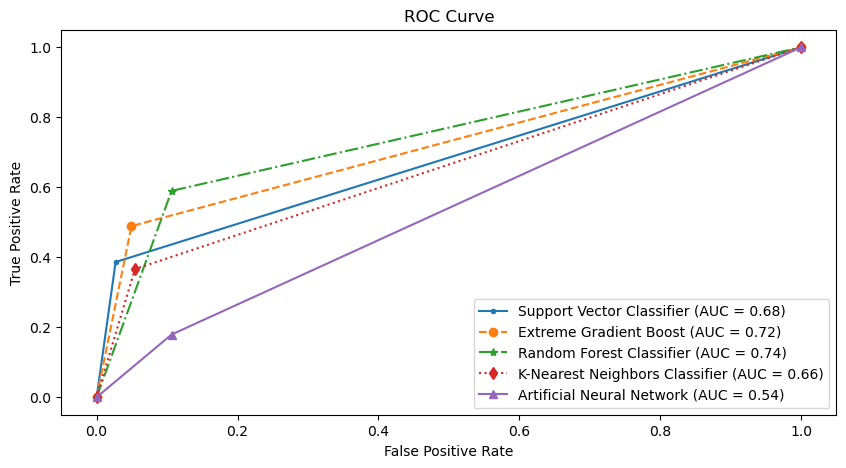

In [130]:
plt.figure(figsize=(10,5))
plt.plot(SVC_fpr,SVC_tpr,linestyle = '-',marker='.',label=f'Support Vector Classifier (AUC = {auc_SVC:.2f})')
plt.plot(XGB_fpr,XGB_tpr,linestyle = '--',marker='o',label=f'Extreme Gradient Boost (AUC = {auc_XGB:.2f})')
plt.plot(RF_fpr,RF_tpr,linestyle = '-.',marker='*',label=f'Random Forest Classifier (AUC = {auc_RF:.2f})')
plt.plot(KNN_fpr,KNN_tpr,linestyle = ':',marker='d',label=f'K-Nearest Neighbors Classifier (AUC = {auc_KNN:.2f})')
plt.plot(ANN_fpr,ANN_tpr,linestyle = '-',marker='^',label=f'Artificial Neural Network (AUC = {auc_ANN:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC_Curve.png',dpi =300)
plt.show()

## Explaining the ML Model With SHap

In [131]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [132]:
pipe_best

Pipeline(steps=[('Encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot_geo_gender',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Geography', 'Gender'])])),
                ('Estimator',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.15,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=1,
                               max_depth=3, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=190,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [133]:
pipe_best.named_steps

{'Encoding': ColumnTransformer(remainder='passthrough',
                   transformers=[('OneHot_geo_gender',
                                  OneHotEncoder(drop='first', sparse=False),
                                  ['Geography', 'Gender'])]),
 'Estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.15, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=1,
               max_depth=3, max_leaves=None, min_child_weight=1, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=190,
               n_jobs=None, num_parallel_tree=None, random_state=None

In [134]:
feature_names_1 = pipe_best.named_steps['Encoding'].named_transformers_['OneHot_geo_gender'].get_feature_names_out()
# feature_names_2 =pipe_best.named_steps['Scaling'].named_transformers_['Scale'].get_feature_names_out() 

In [135]:
feature_names_1

array(['Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype=object)

In [136]:
# feature_names_2

[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.783 total time=   0.1s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=150;, score=0.818 total time=   0.2s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=150;, score=0.818 total time=   0.2s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.831 total time=   0.1s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=150;, score=0.868 total time=   0.3s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delt

[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.792 total time=   0.1s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=150;, score=0.765 total time=   0.2s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=150;, score=0.789 total time=   0.2s
[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.823 total time=   0.2s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.821 total time=   0.2s
[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delt

[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.803 total time=   0.2s
[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=100;, score=0.785 total time=   0.2s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=3, Estimator__n_estimators=50;, score=0.809 total time=   0.1s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=3, Estimator__n_estimators=100;, score=0.757 total time=   0.2s
[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.837 total time=   0.2s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_del

[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.809 total time=   0.2s
[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=50;, score=0.792 total time=   0.1s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=100;, score=0.785 total time=   0.2s
[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=3, Estimator__n_estimators=100;, score=0.785 total time=   0.2s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.791 total time=   0.2s
[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta

[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.790 total time=   0.2s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=100;, score=0.757 total time=   0.1s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=3, Estimator__n_estimators=50;, score=0.763 total time=   0.1s
[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=3, Estimator__n_estimators=150;, score=0.788 total time=   0.2s
[CV 3/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.849 total time=   0.2s
[CV 1/5] END Estimator__learning_rate=0.1, Estimator__max_del

[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=1, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.777 total time=   0.1s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=1, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.757 total time=   0.2s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=1, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=50;, score=0.780 total time=   0.1s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=1, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=150;, score=0.791 total time=   0.2s
[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=1, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=50;, score=0.809 total time=   0.1s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta

In [137]:
## we will extract all feature names from pipeline
## 1st step is one_hot encoding on two column Geography and Gender which will increase the columns by one since we are using 
#---drop first feature
feature_names = ['CreditScore', 'Geography_Germany', 'Geography_Spain', 'Gender_Male','Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

In [138]:
X_train_trans_df = pd.DataFrame(data=X_train_trans, columns=feature_names)


In [139]:
X_test_trans_df = pd.DataFrame(data=X_test_trans, columns=feature_names)


In [140]:
results = pd.concat([pd.DataFrame(y_pred_XG),pd.DataFrame(y_pred_RF),pd.DataFrame(y_pred_ANN),
                    pd.DataFrame(y_pred_SVC),pd.DataFrame(y_pred_KNN)],axis = 1)

In [141]:
results.columns= ['XGB','RF','ANN','SVC','KNN']

In [142]:
results.head()

XGB  RF  ANN  SVC  KNN
0    0   0    0    0    0
1    0   0    0    0    0
2    0   0    0    0    0
3    0   0    0    0    0
4    0   0    0    0    0

In [143]:
orig = pd.DataFrame(y_test)

In [144]:
orig.columns = ['Churn']

In [145]:
orig = orig.reset_index(drop = True)

In [146]:
comp_mod_orig = pd.concat([results,orig],axis = 1)

In [147]:
comp_mod_orig.head()

XGB  RF  ANN  SVC  KNN  Churn
0    0   0    0    0    0      0
1    0   0    0    0    0      0
2    0   0    0    0    0      0
3    0   0    0    0    0      0
4    0   0    0    0    0      0

In [152]:
#pip install shap

In [153]:
import shap

In [154]:
## we are using our XGBoost model pipeline for the explanation

In [155]:
## shap doesnot support direct explanation of pipeline model

##Extracting the classifier step from pipeline

estimator_step = pipe_best.named_steps['Estimator']   #(this line refers to our XGBoost model)


In [156]:
Explainer = shap.TreeExplainer(estimator_step)

In [157]:
## explaining the estimator(XGBoost using SHAP Values)
shap_values = Explainer(X_test_trans_df) #(we are passing dataframe so that we can get name of column instead of feature_0,feature_1...)

## WaterFall Plot

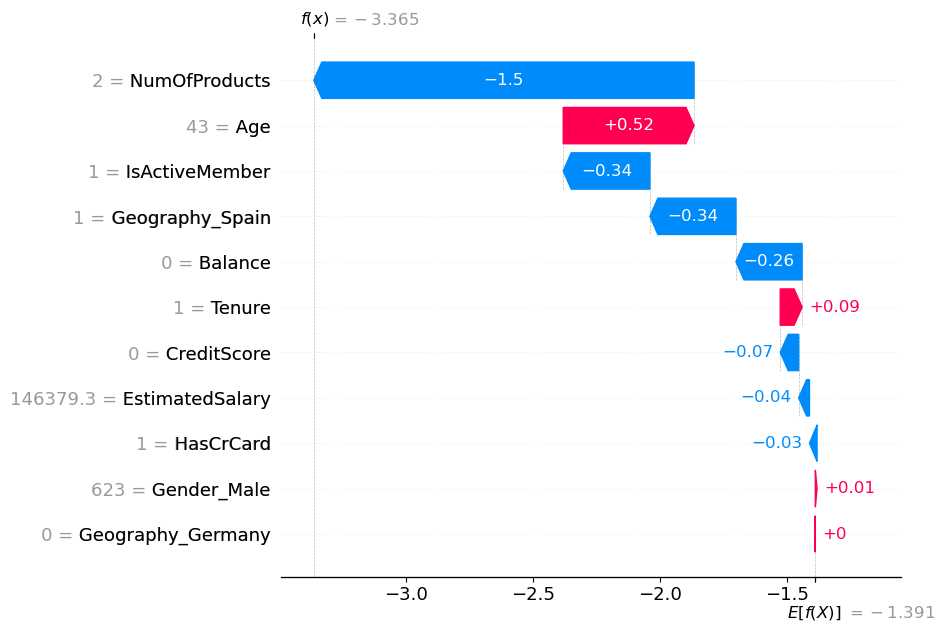

<Figure size 640x480 with 0 Axes>

In [158]:

shap.plots.waterfall(shap_values[1],max_display = 15)
plt.savefig('Waterfall.png',dpi =300)
plt.show()

### Summary Plot or Beeswarm Plot

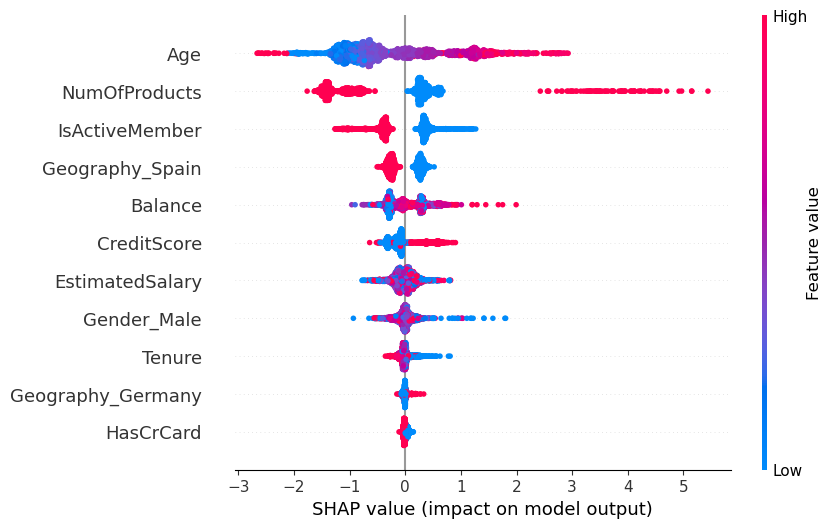

<Figure size 640x480 with 0 Axes>

In [159]:
shap.plots.beeswarm(shap_values,max_display = 15)
plt.savefig('beeswarm_plot.png',dpi = 300)
plt.show()

## Barplot

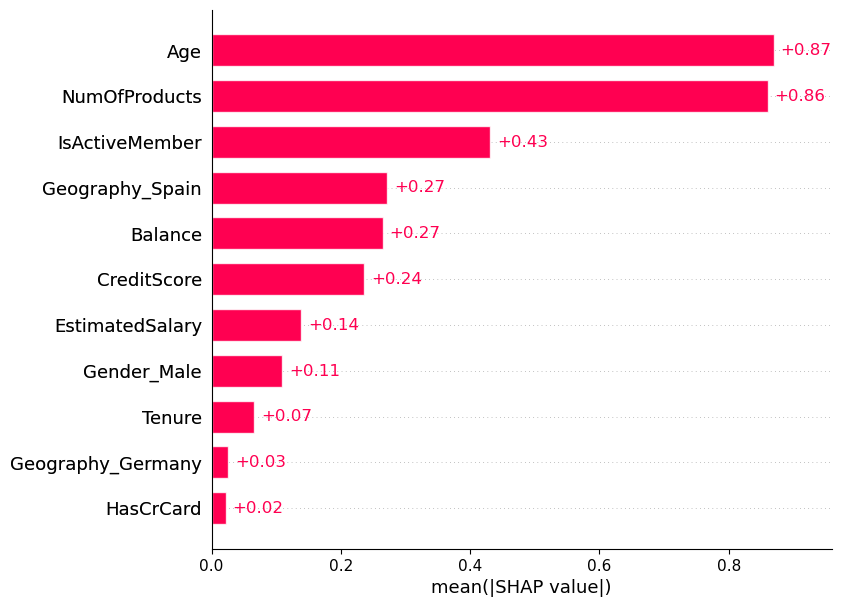

<Figure size 640x480 with 0 Axes>

In [160]:
shap.plots.bar(shap_values,max_display = 15)
plt.savefig('barplot_shap.png')
plt.show()

In [161]:
## Local interpretaion of Shapley value for the instance of churn value (1)

shap.initjs()
plt.savefig('forceplot1.png',dpi = 300)
shap.plots.force(shap_values[2489])


<Figure size 640x480 with 0 Axes>

In [162]:
## Local interpretation of shapley value for the instance of not churn i.e churn value(0)

shap.initjs()
plt.savefig('forceplot2.png',dpi = 300)
shap.plots.force(shap_values[12])



<Figure size 640x480 with 0 Axes>

In [163]:
comp_mod_orig.tail(15)

XGB  RF  ANN  SVC  KNN  Churn
2485    0   0    0    0    0      0
2486    0   0    0    0    0      1
2487    0   1    0    1    1      0
2488    0   0    0    0    0      0
2489    0   0    0    0    0      0
2490    0   1    0    0    0      1
2491    0   0    0    0    0      0
2492    0   0    0    0    0      1
2493    0   0    0    0    0      0
2494    0   0    0    0    0      0
2495    0   0    1    0    0      0
2496    1   1    0    1    0      1
2497    0   0    0    0    0      0
2498    0   0    0    0    0      0
2499    0   0    1    0    0      0

## Explaining the model with lime

In [176]:
#pip install lime

[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=1, Estimator__n_estimators=100;, score=0.757 total time=   0.2s
[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=50;, score=0.777 total time=   0.1s
[CV 2/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=2, Estimator__n_estimators=150;, score=0.793 total time=   0.2s
[CV 4/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=1, Estimator__min_child_weight=3, Estimator__n_estimators=150;, score=0.765 total time=   0.2s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_delta_step=0, Estimator__max_depth=3, Estimator__min_child_weight=1, Estimator__n_estimators=150;, score=0.834 total time=   0.3s
[CV 5/5] END Estimator__learning_rate=0.1, Estimator__max_del

In [165]:
import lime
from lime import lime_tabular

In [166]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data = X_train_trans,feature_names = X_train_trans_df.columns,
                                                  mode = 'classification',class_names = ['Not churn','churn'])

In [167]:
## Explaining particular instance where the customer get churned


explanation_NotChurn = lime_explainer.explain_instance(X_test_trans[2489],estimator_step.predict_proba)
explanation_NotChurn.show_in_notebook(show_table=True)

In [168]:
explanation_NotChurn_df = pd.DataFrame(explanation_NotChurn.as_list(), columns=["Feature", "Weight"])


In [169]:
explanation_NotChurn_df

Feature    Weight
0                   Age <= 32.00 -0.160339
1   1.00 < NumOfProducts <= 2.00 -0.153223
2  0.00 < IsActiveMember <= 1.00 -0.125792
3        Geography_Spain <= 0.00  0.070450
4     0.00 < CreditScore <= 1.00  0.027220
5          5.00 < Tenure <= 7.00 -0.009876
6    EstimatedSalary > 149952.47  0.009039
7       0.00 < HasCrCard <= 1.00 -0.008756
8            Balance > 127685.68  0.005995
9           Gender_Male > 719.00 -0.003407

In [170]:
## Explaining particular instance where the customer doesnot get churned


explanation_Churn = lime_explainer.explain_instance(X_test_trans[11],estimator_step.predict_proba)

explanation_Churn.show_in_notebook(show_table=True)
explanation_Churn.save_to_file('lime_plot_Churn.html')

In [171]:
explanation_Churn_df = pd.DataFrame(explanation_NotChurn.as_list(), columns=["Feature", "Weight"])

In [172]:
explanation_Churn_df

Feature    Weight
0                   Age <= 32.00 -0.160339
1   1.00 < NumOfProducts <= 2.00 -0.153223
2  0.00 < IsActiveMember <= 1.00 -0.125792
3        Geography_Spain <= 0.00  0.070450
4     0.00 < CreditScore <= 1.00  0.027220
5          5.00 < Tenure <= 7.00 -0.009876
6    EstimatedSalary > 149952.47  0.009039
7       0.00 < HasCrCard <= 1.00 -0.008756
8            Balance > 127685.68  0.005995
9           Gender_Male > 719.00 -0.003407

In [173]:
comp_mod_orig.to_csv("Comparision_of_model.csv ",index= False)

In [174]:
comp_mod_orig.head(20)

XGB  RF  ANN  SVC  KNN  Churn
0     0   0    0    0    0      0
1     0   0    0    0    0      0
2     0   0    0    0    0      0
3     0   0    0    0    0      0
4     0   0    0    0    0      0
5     0   0    0    0    0      0
6     0   0    1    0    0      0
7     0   0    0    0    0      1
8     0   1    1    0    1      0
9     0   0    0    0    1      0
10    1   1    0    1    0      1
11    1   1    0    1    1      1
12    1   1    0    1    1      1
13    0   1    0    0    1      0
14    0   0    0    0    0      0
15    0   0    0    0    0      0
16    0   0    0    0    0      0
17    0   0    0    0    0      0
18    0   0    0    0    0      0
19    0   0    0    0    0      0

In [175]:
# import pickle

In [ ]:
#filename = 'churn.sav'

In [ ]:
#pickle.dump(pipe_best,open(filename,'wb'))

In [ ]:
#load_model = pickle.load(open(filename,'rb'))

In [ ]:
#load_model.score(X_test,y_test)

In [165]:
# with open('churn.pkl', 'wb') as file:
#     pickle.dump(pipe_best,file)